In [2]:
import pandas as pd
data=pd.read_csv("/content/Affairs (1).csv")
print(data)

     rownames  gender   age  yearsmarried children  religiousness  education  \
0           4    male  37.0         10.00       no              3         18   
1           5  female  27.0          4.00       no              4         14   
2          11  female  32.0         15.00      yes              1         12   
3          16    male  57.0         15.00      yes              5         18   
4          23    male  22.0          0.75       no              2         17   
..        ...     ...   ...           ...      ...            ...        ...   
596      1938    male  22.0          1.50      yes              1         12   
597      1941  female  32.0         10.00      yes              2         18   
598      1954    male  32.0         10.00      yes              2         17   
599      1959    male  22.0          7.00      yes              3         18   
600      9010  female  32.0         15.00      yes              3         14   

     occupation  rating  affairs  
0   

In [3]:
data.isnull().sum()

rownames         0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
affairs          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["gender"]=b.fit_transform(data["gender"])
data["children"]=b.fit_transform(data["children"])
print(data)

     rownames  gender   age  yearsmarried  children  religiousness  education  \
0           4       1  37.0         10.00         0              3         18   
1           5       0  27.0          4.00         0              4         14   
2          11       0  32.0         15.00         1              1         12   
3          16       1  57.0         15.00         1              5         18   
4          23       1  22.0          0.75         0              2         17   
..        ...     ...   ...           ...       ...            ...        ...   
596      1938       1  22.0          1.50         1              1         12   
597      1941       0  32.0         10.00         1              2         18   
598      1954       1  32.0         10.00         1              2         17   
599      1959       1  22.0          7.00         1              3         18   
600      9010       0  32.0         15.00         1              3         14   

     occupation  rating  af

In [5]:
x=data.iloc[:,:-1]
y=data["affairs"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

     rownames  gender   age  yearsmarried  children  religiousness  education  \
311      1336       0  22.0           7.0         1              4         14   
143       717       1  52.0          15.0         1              2         18   
109       543       0  22.0           1.5         0              2         14   
131       647       1  42.0          15.0         1              4         18   
193       904       1  37.0          15.0         1              4         20   
..        ...     ...   ...           ...       ...            ...        ...   
467       186       1  37.0          10.0         1              2         18   
302      1314       1  32.0           4.0         1              2         16   
87        445       0  27.0           1.5         0              3         18   
103       517       1  57.0          15.0         1              5         20   
79        409       1  57.0          15.0         1              2         14   

     occupation  rating  
3

In [7]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
c=br.predict([[9011,0,40,20,0,1,3,7,7]])
print("Output :",c)

Output : [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 601 artists>

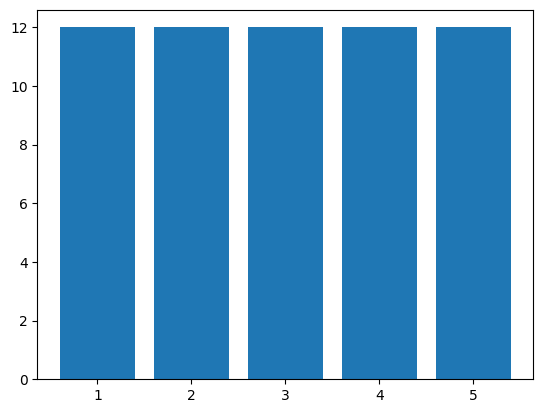

In [ ]:
from matplotlib import pyplot as plt
plt.bar(data["rating"],data["affairs"])

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[9 0 0]
 [3 0 0]
 [1 0 0]]


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.6923076923076923


In [15]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           7       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

    accuracy                           0.69        13
   macro avg       0.23      0.33      0.27        13
weighted avg       0.48      0.69      0.57        13



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
